## Detection of resistance and support

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf #pip install yfinance
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
yf.pdr_override() 
start = dt.datetime(2020,5,1) #set start point of dataframe
now = dt.datetime.now() #set end point of dataframe
stock = ['TSLA'] #set stock we are looking
df = pdr.get_data_yahoo(stock,start,now)

[*********************100%***********************]  1 of 1 completed


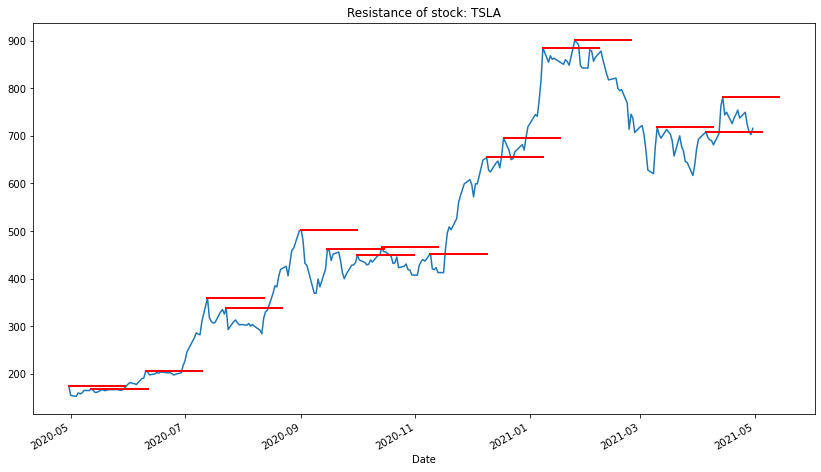

In [3]:
# Pivot definition: maximum of high in ten days
# we need to find points where there are five days before this point and five days after this point

df['High'].plot(label = 'high',figsize=(14,8))
pivots = []#store the pivot values
dates = [] #store dates of the pivot values
counter = 0 #count 
lastPivot =0 #

Range = [0]*10
dateRange = [0,0,0,0,0,0,0,0,0,0]

for i in df.index:
    currentMax = max(Range, default = 0)
    value = round(df['High'][i],2)
    
    Range = Range[1:9]
    Range.append(value)
    dateRange = dateRange[1:9]
    dateRange.append(i)
    
    if currentMax == max(Range,default = 0):
        counter +=1
    else:
        counter = 0
    if counter == 5:
        lastPivot = currentMax
        dateloc = Range.index(lastPivot)
        lastDate = dateRange[dateloc]
        pivots.append(lastPivot)
        dates.append(lastDate)

timeD=dt.timedelta(days=30) #plot a line for 30 days    
for index in range(len(pivots)):
    #print(str(pivots[index])+ ":"+ str(dates[index]))
    plt.plot_date([dates[index],dates[index]+timeD], 
                 [pivots[index],pivots[index]], linestyle = '-',linewidth = 2, marker = ',', color = 'red') 

plt.title('Resistance of stock: '+stock[0])
plt.show()

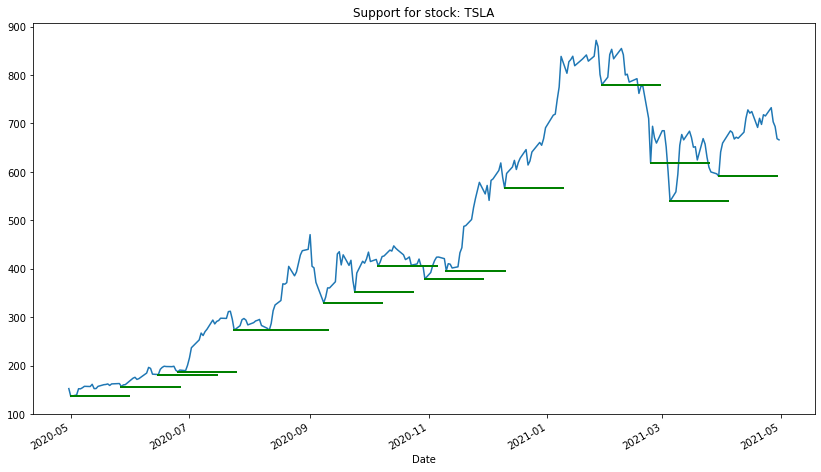

In [4]:
# Pivot definition: minimum of low in ten days
# we need to find points where there are five days before this point and five days after this point


df['Low'].plot(label = 'low',figsize=(14,8))
pivots = []#store the pivot values
dates = [] #store dates of the pivot values
counter = 0 #count 
lastPivot = 0 #

Range = [1000] * 10
dateRange = [0,0,0,0,0,0,0,0,0,0]

for i in df.index:
    currentMax = min(Range, default = 900)
    value = round(df['Low'][i],2)
    
    Range = Range[1:9]
    Range.append(value)
    dateRange = dateRange[1:9]
    dateRange.append(i)
    if currentMax == min(Range,default = 0):
        counter +=1
    else:
        counter = 0
    if counter == 5:
        lastPivot = currentMax
        dateloc = Range.index(lastPivot)
        lastDate = dateRange[dateloc]
        pivots.append(lastPivot)
        dates.append(lastDate)
#print(pivots)
timeD=dt.timedelta(days=30) #plot a line for 30 days    
for index in range(len(pivots)):
    #print(str(pivots[index])+ ":"+ str(dates[index]))
    plt.plot_date([dates[index],dates[index]+timeD], 
                 [pivots[index],pivots[index]], linestyle = '-',linewidth = 2, marker = ',',color = 'green') 

plt.title('Support for stock: '+ stock[0])
plt.show()